## Summary: Compare model results and final model selection

In [1]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')

#### Import validation and test data

In [2]:
val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

#### Read the models that are saved

In [3]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB','XGB']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [4]:
models

{'LR': LogisticRegression(C=0.01),
 'SVM': SVC(C=1),
 'MLP': MLPClassifier(activation='tanh', hidden_layer_sizes=(50,)),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=50),
 'GB': GradientBoostingClassifier(max_depth=1, n_estimators=250),
 'XGB': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.01, max_delta_step=0,
               max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=250, n_jobs=4,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)}

### Accuracy = Predict Correctly/Total Examples <br> Precision = Predicted as Over that actually Over/ Total Predicted Over <br> Recall = Predicted as Over that actually Over/Total that actually is Over

### Function to evaluate the models

In [5]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    f1 = round(recall_score(labels, pred), 3)
    cks = round(cohen_kappa_score(labels, pred), 3)
    auc = round(roc_auc_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / F1: {} / CohenKappa: {} / AUC: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   f1,
                                                                                   cks,
                                                                                   auc,                                     
                                                                                   round((end - start)*1000, 1)))

### Run the models on Validation dataset (unseen data)

In [6]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 0.582 / Precision: 0.579 / Recall: 0.821 / F1: 0.821 / CohenKappa: 0.128 / AUC: 0.562 / Latency: 27.6ms
SVM -- Accuracy: 0.574 / Precision: 0.572 / Recall: 0.838 / F1: 0.838 / CohenKappa: 0.108 / AUC: 0.552 / Latency: 8718.7ms
MLP -- Accuracy: 0.593 / Precision: 0.596 / Recall: 0.757 / F1: 0.757 / CohenKappa: 0.162 / AUC: 0.579 / Latency: 0.0ms
RF -- Accuracy: 0.588 / Precision: 0.6 / Recall: 0.706 / F1: 0.706 / CohenKappa: 0.158 / AUC: 0.578 / Latency: 31.2ms
GB -- Accuracy: 0.58 / Precision: 0.59 / Recall: 0.719 / F1: 0.719 / CohenKappa: 0.138 / AUC: 0.568 / Latency: 15.6ms
XGB -- Accuracy: 0.581 / Precision: 0.593 / Recall: 0.714 / F1: 0.714 / CohenKappa: 0.143 / AUC: 0.57 / Latency: 22.1ms


### Evaluate best model on test dataset


In [7]:
evaluate_model('MLPClassifier', models['MLP'], te_features, te_labels)

MLPClassifier -- Accuracy: 0.587 / Precision: 0.586 / Recall: 0.741 / F1: 0.741 / CohenKappa: 0.159 / AUC: 0.578 / Latency: 14.0ms


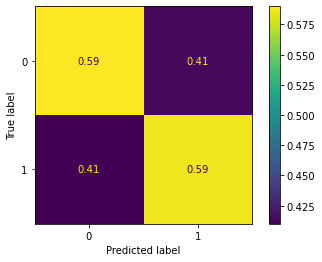

In [8]:
ConfusionMatrixDisplay.from_estimator(models['MLP'], te_features, te_labels, normalize = 'pred')

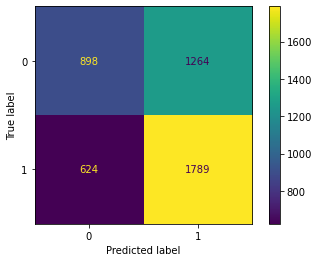

In [9]:
ConfusionMatrixDisplay.from_estimator(models['MLP'], te_features, te_labels)